In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd 
from sklearn.metrics import adjusted_rand_score



from models.PriorParameters import GMMPriorParameters
from models.PriorParameters import BMMPriorParameters
from models.GMMGibbs import GMMGibbs
from models.BMMGibbs import BMMGibbs
from models.GMMVBEM import GMMVBEM
from models.BMMVBEM import BMMVBEM
from models.BMMEM import BMMEM
from models.GMMEM import GMMEM

from utils.ArbitraryImputer import mean_impute, median_impute, mode_impute
from utils.EvaluationUtilities import rmse, multi_restart, run_full_evaluation, get_full_results

from datasets.Dataset import Dataset

In [2]:
def plot_ari_by_missingness_line(df, metric,title,ylabel):

    # Set style
    # sns.set(style="whitegrid")

    # Create figure and axis
    plt.figure(figsize=(10, 6))

    # Unique methods
    methods = df['method'].unique()
    missing_rates = sorted(df['missing_rate'].unique())

    # Plot each method
    for method in methods:
        sub_df = df[df['method'] == method].sort_values(by='missing_rate')
        plt.errorbar(
            sub_df['missing_rate'],
            sub_df[metric] if metric in sub_df.columns else sub_df[metric],
            yerr=sub_df[f'{metric}_std'] if f'{metric}_std' in sub_df.columns else sub_df[f'{metric}_std'],
            label=method,
            capsize=4,
            marker='o',
            linestyle='-'
        )

    plt.xlabel('Missing Rate')
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [3]:
def plot_grouped_bar_metric(df, metric, title, ylabel):

    methods = sorted(df['method'].unique())
    missing_rates = sorted(df['missing_rate'].unique())
    n_methods = len(methods)
    bar_width = 0.8 / n_methods
    x = np.arange(len(missing_rates))

    fig, ax = plt.subplots(figsize=(12, 6))

    for i, method in enumerate(methods):
        # if "mode" in method or "median" in method:
        #     continue
        method_df = df[df['method'] == method].sort_values(by='missing_rate')
        means = method_df[metric].values
        stds = method_df[f"{metric}_std"].values
        ax.bar(x + i * bar_width, means, bar_width, label=method, yerr=stds, capsize=4)

    ax.set_xlabel('Missing Rate')
    ax.set_ylabel(ylabel)
    ax.set_title(title)
    ax.set_xticks(x + bar_width * (n_methods - 1) / 2)
    ax.set_xticklabels([f"{mr:.1f}" for mr in missing_rates])
    ax.legend()
    plt.tight_layout()
    plt.show()

Summary

GMM : 
1) Digits
2) Iris 
3) Synthetic 

BMM : 
1) Synthetic 
2) MP
3) Shapes

# 1 BMM

## 1.1 Shapes Dataset

In [1082]:
shapes_df = pd.read_csv("Results/bmm_shapes.csv")

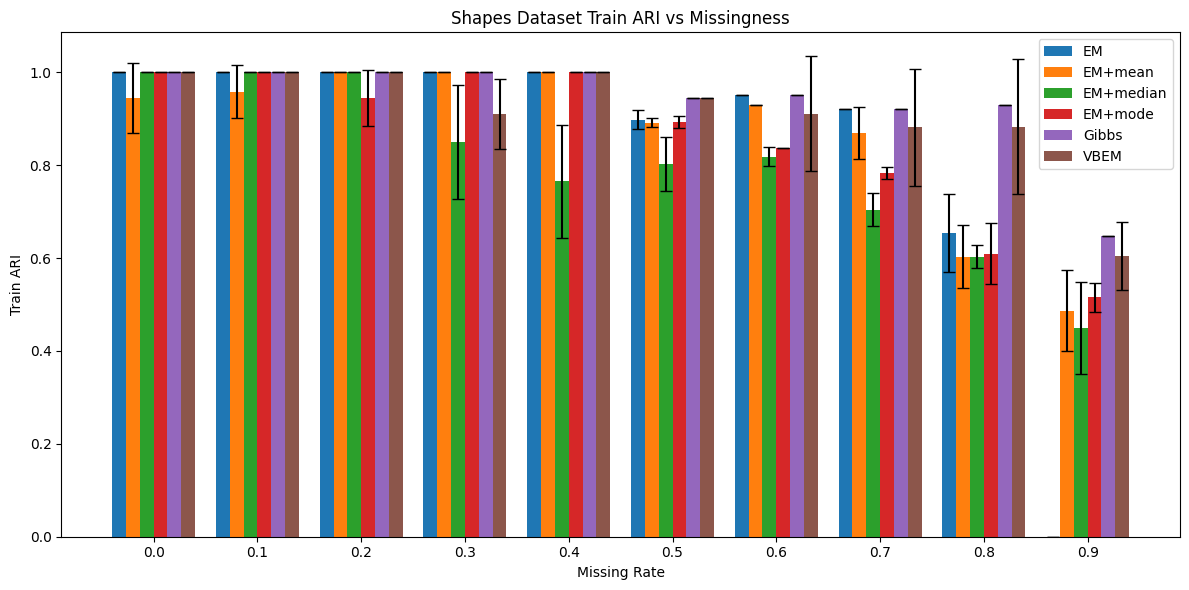

In [1232]:
plot_grouped_bar_metric(shapes_df, metric='train_ARI', title="Shapes Dataset Train ARI vs Missingness", ylabel="Train ARI")

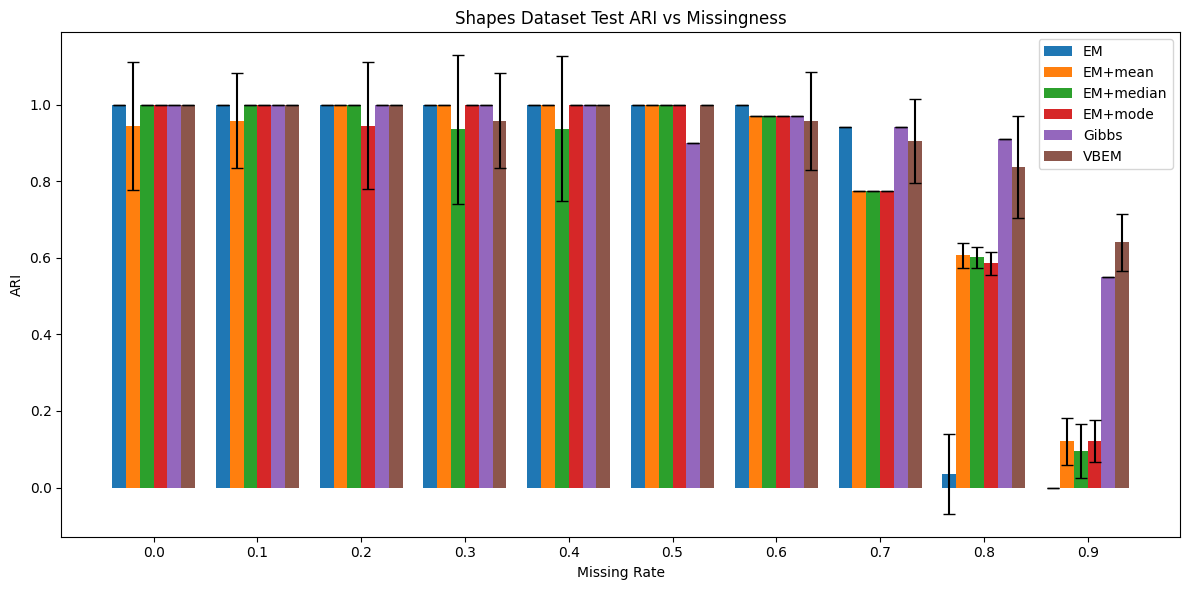

In [1235]:
plot_grouped_bar_metric(shapes_df, metric='test_ARI', title="Shapes Dataset Test ARI vs Missingness", ylabel="ARI")

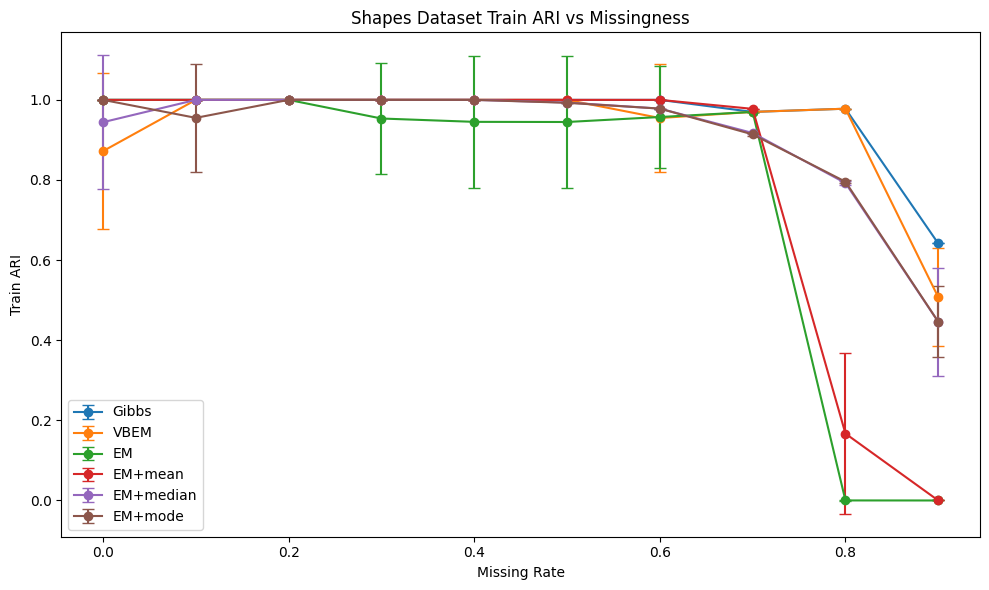

In [98]:
plot_ari_by_missingness_line(shapes_df, metric='train_ARI', title="Shapes Dataset Train ARI vs Missingness", ylabel="Train ARI")

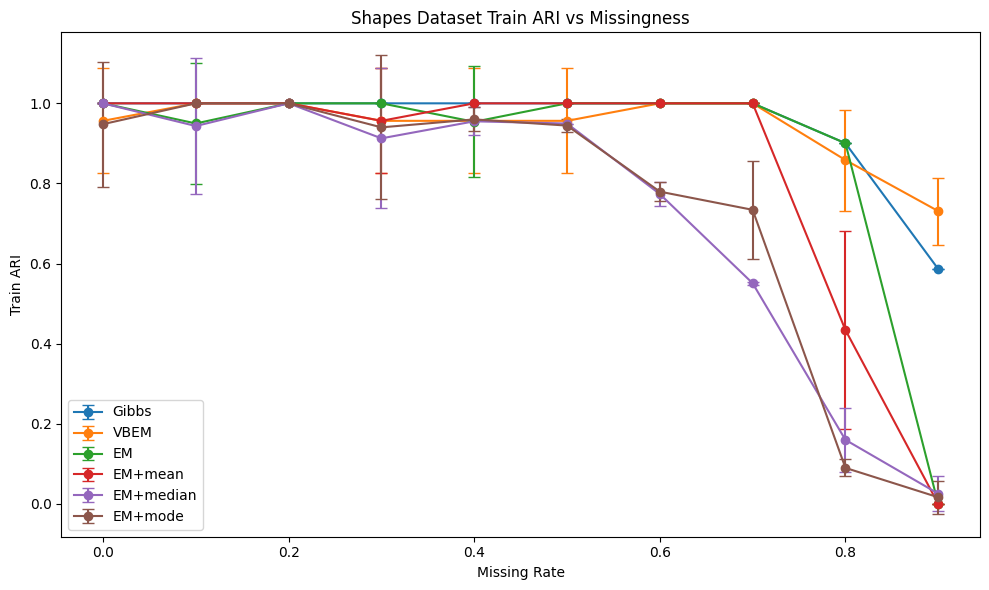

In [93]:
plot_ari_by_missingness_line(shapes_df, metric='test_ARI', title="Shapes Dataset Train ARI vs Missingness", ylabel="Train ARI")

## 1.2 Synthetic Good

In [777]:
synthetic_df = pd.read_csv("./Results/bmm_synthetic.csv")

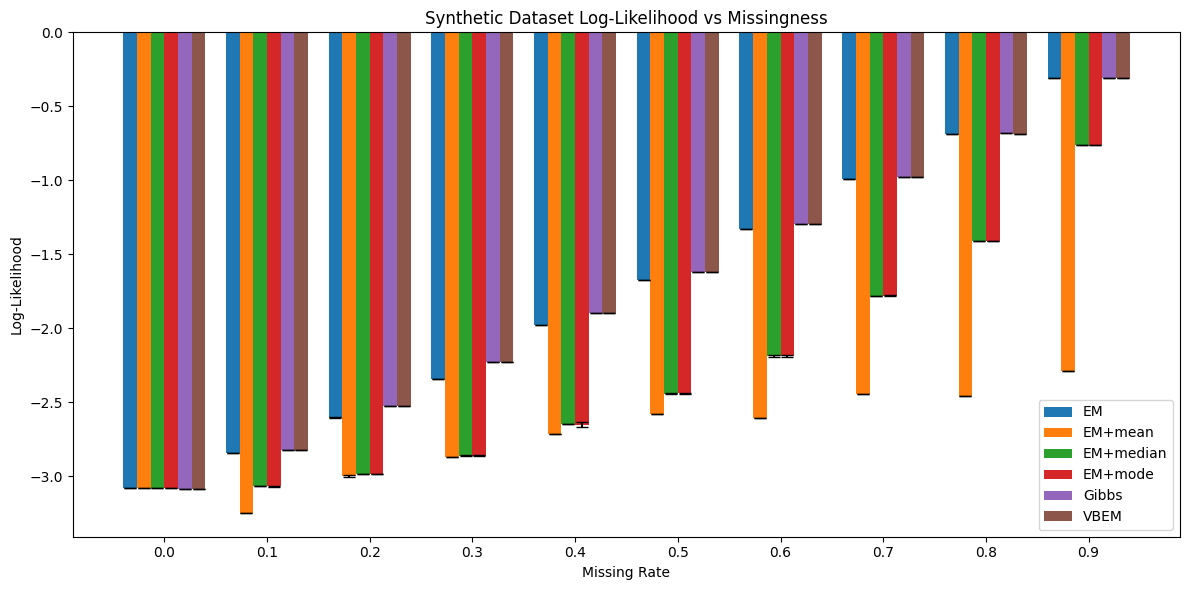

In [833]:
plot_grouped_bar_metric(synthetic_df, metric='loglike', title="Synthetic Dataset Log-Likelihood vs Missingness", ylabel="Log-Likelihood")

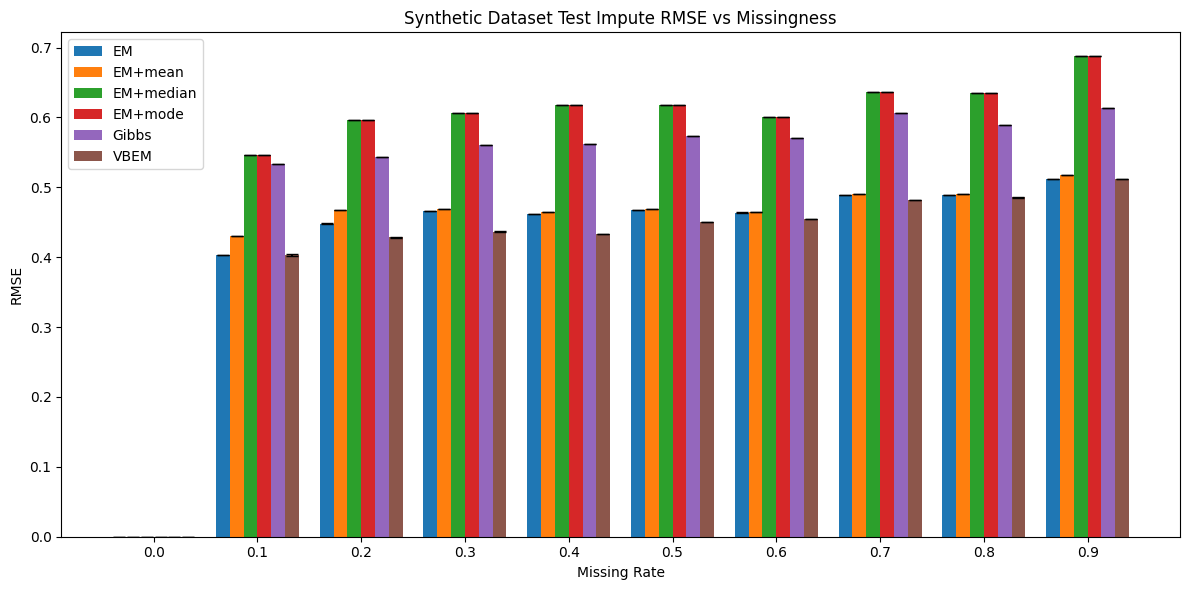

In [813]:
plot_grouped_bar_metric(synthetic_df, metric='RMSE_test', title="Synthetic Dataset Test Impute RMSE vs Missingness", ylabel="RMSE")

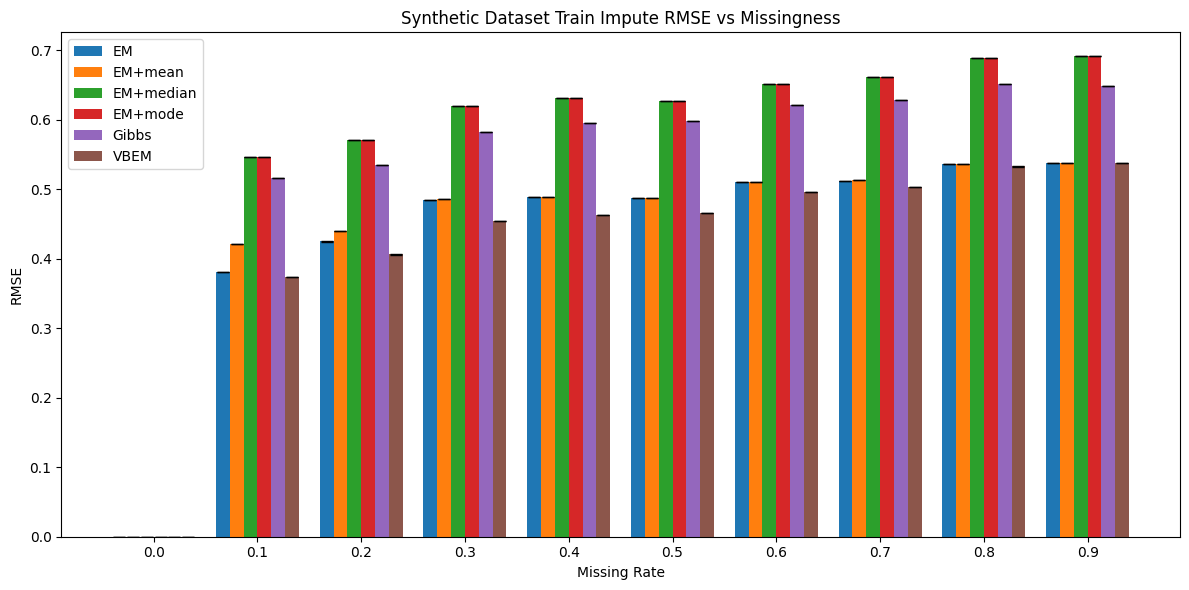

In [818]:
plot_grouped_bar_metric(synthetic_df, metric='RMSE_train', title="Synthetic Dataset Train Impute RMSE vs Missingness", ylabel="RMSE")

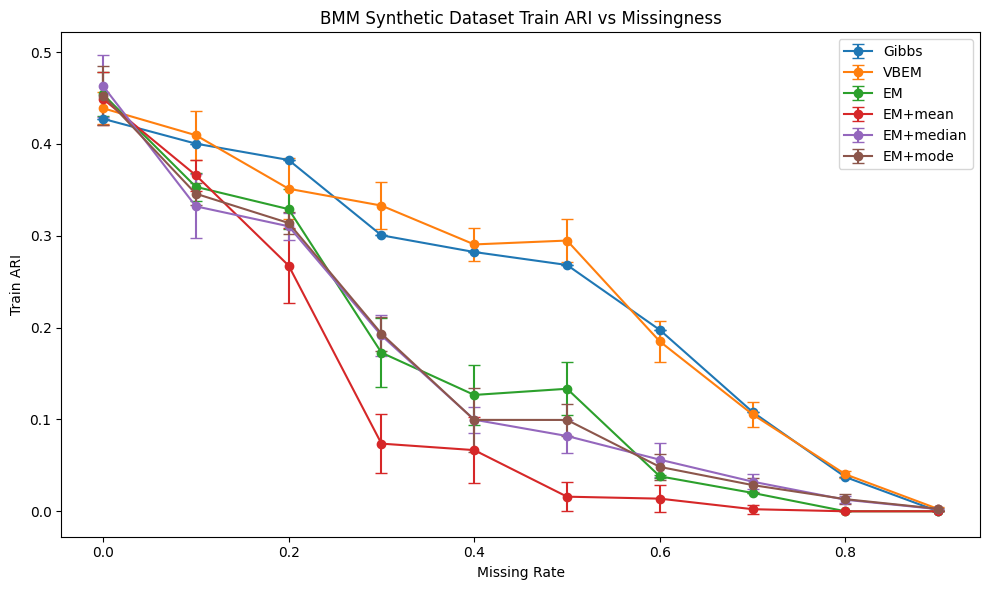

In [1238]:
plot_ari_by_missingness_line(synthetic_df, metric='train_ARI', title="BMM Synthetic Dataset Train ARI vs Missingness", ylabel="Train ARI")

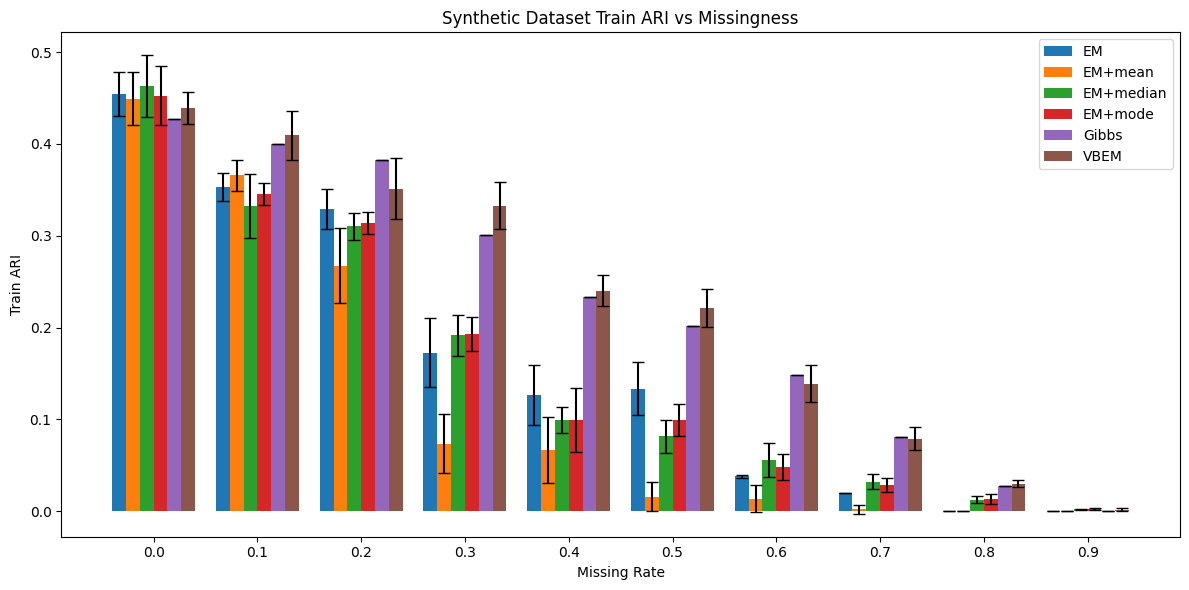

In [1000]:
plot_grouped_bar_metric(synthetic_df, metric='train_ARI', title="Synthetic Dataset Train ARI vs Missingness", ylabel="Train ARI")

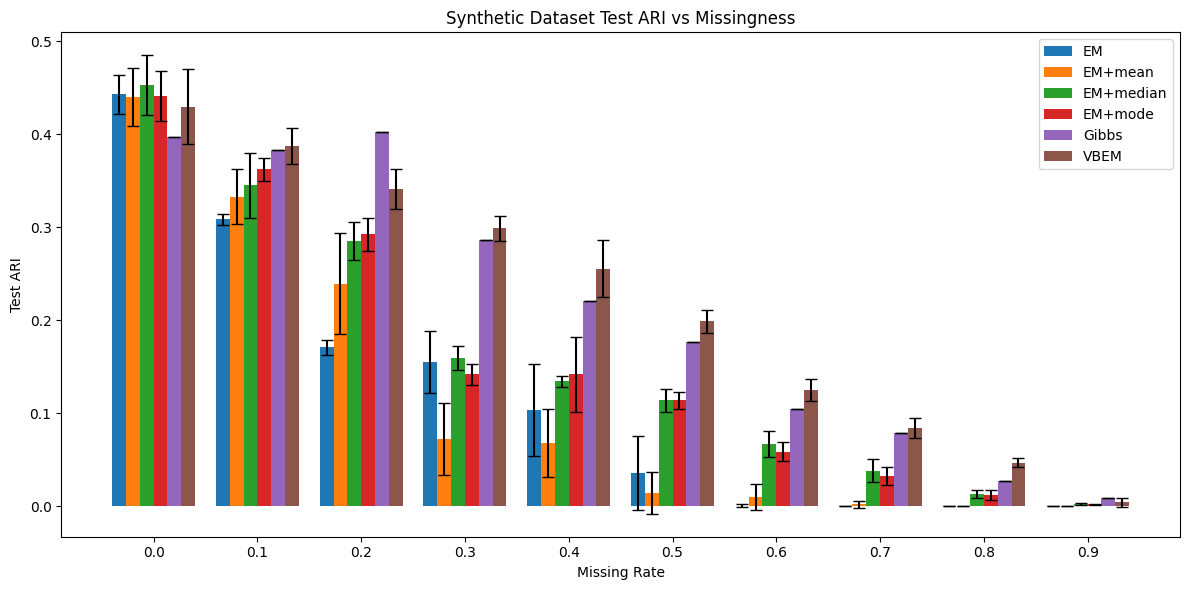

In [1079]:
plot_grouped_bar_metric(synthetic_df, metric='test_ARI', title="Synthetic Dataset Test ARI vs Missingness", ylabel="Test ARI")

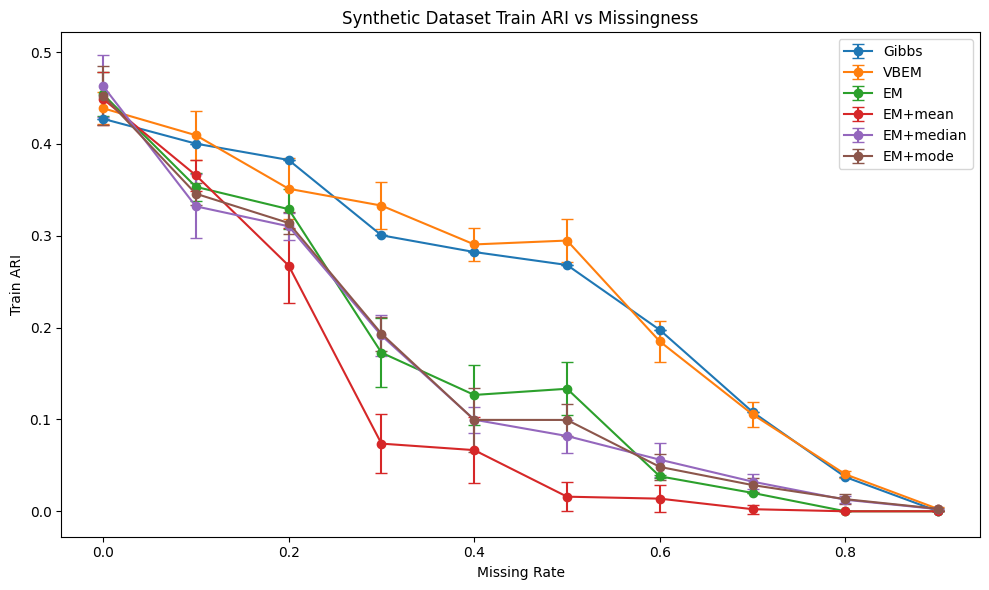

In [1050]:
plot_ari_by_missingness_line(synthetic_df, metric='train_ARI', title="Synthetic Dataset Train ARI vs Missingness", ylabel="Train ARI")

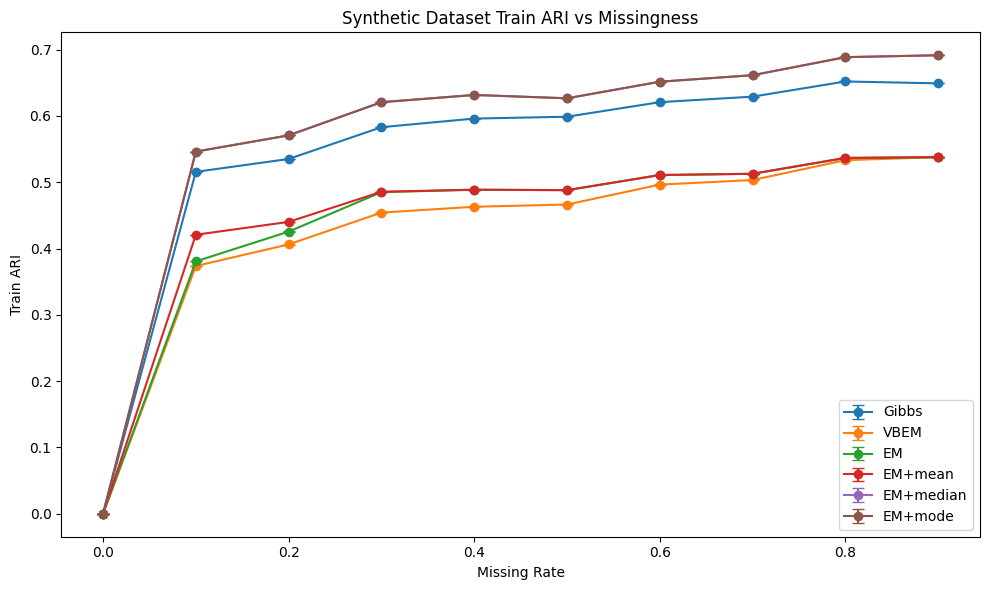

In [1080]:
plot_ari_by_missingness_line(synthetic_df, metric='RMSE_train', title="Synthetic Dataset Train ARI vs Missingness", ylabel="Train ARI")

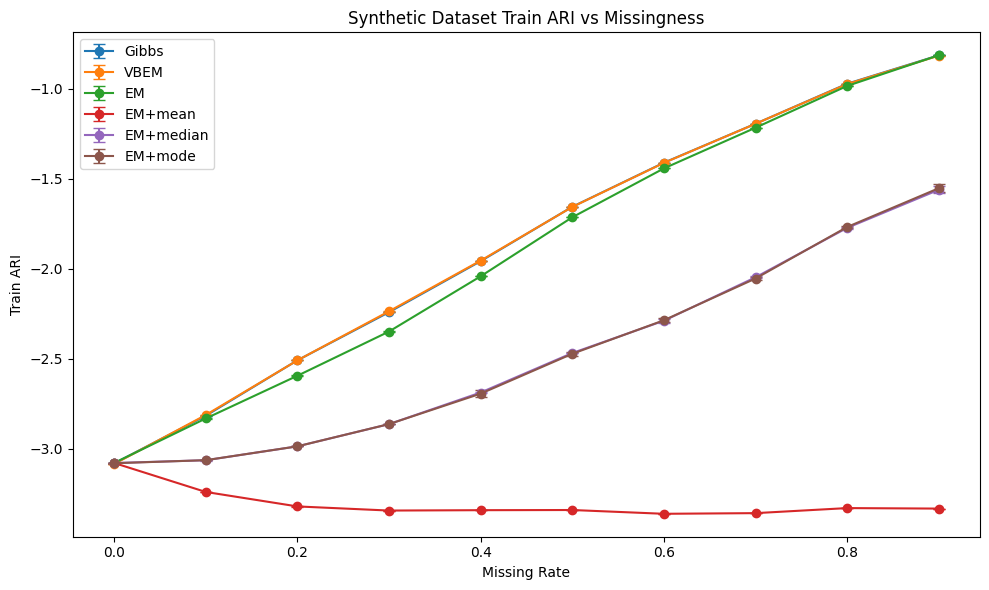

In [25]:
plot_ari_by_missingness_line(synthetic_df, metric='loglike', title="Synthetic Dataset Train ARI vs Missingness", ylabel="Train ARI")

## 1.4 MP

In [88]:
dirpath = "./../Datasets/Bernoulli/Processed/MP2024/"
X_train_mp = np.load(dirpath + "X_mp2024.npy")
y_train_mp = np.load(dirpath + "y_mp2024.npy")

Gibbs

In [89]:
mp_priors = BMMPriorParameters(X_train_mp, 9)
mp_gibbs_model = BMMGibbs(mp_priors)
aligned_results = mp_gibbs_model.fit(X_train_mp)

---

# 2 GMM

## 2.1 Palmer Penguins GOOD

In [768]:
penguin_df = pd.read_csv("./Results/gmm_penguin.csv")

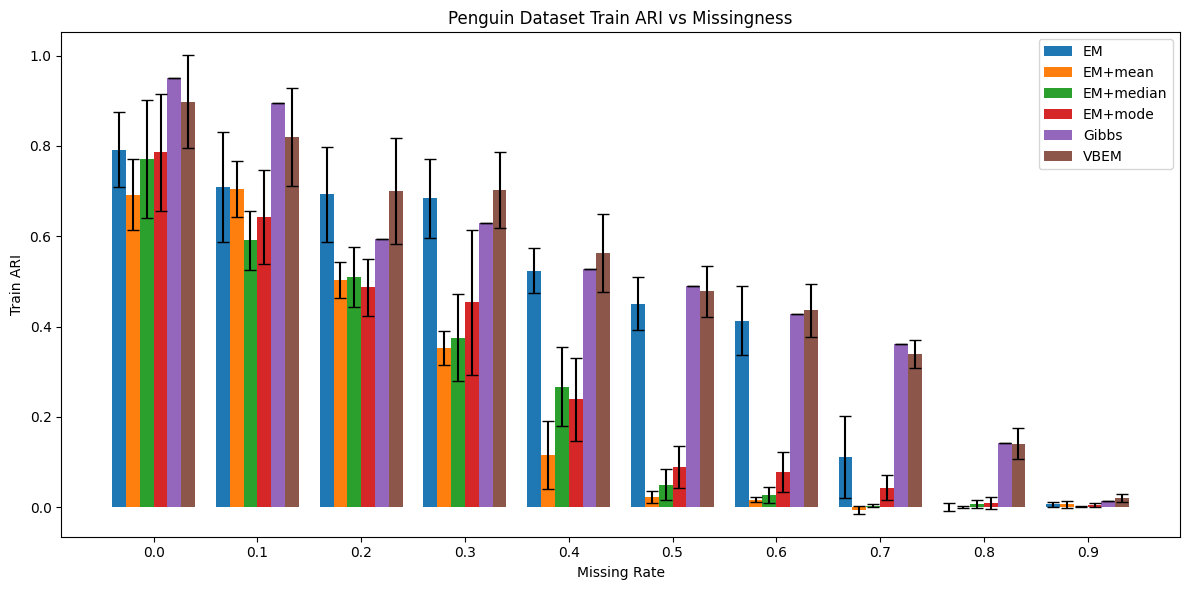

In [769]:
plot_grouped_bar_metric(penguin_df, metric='train_ARI', title="Penguin Dataset Train ARI vs Missingness", ylabel="Train ARI")

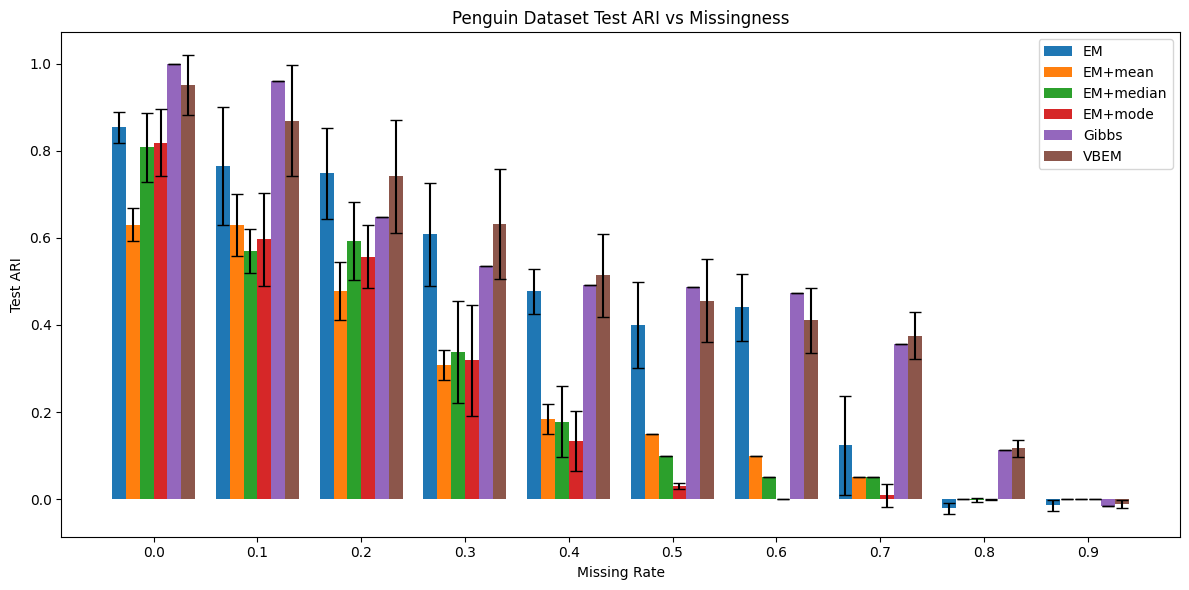

In [747]:
plot_grouped_bar_metric(penguin_df, metric='test_ARI', title="Penguin Dataset Test ARI vs Missingness", ylabel="Test ARI")

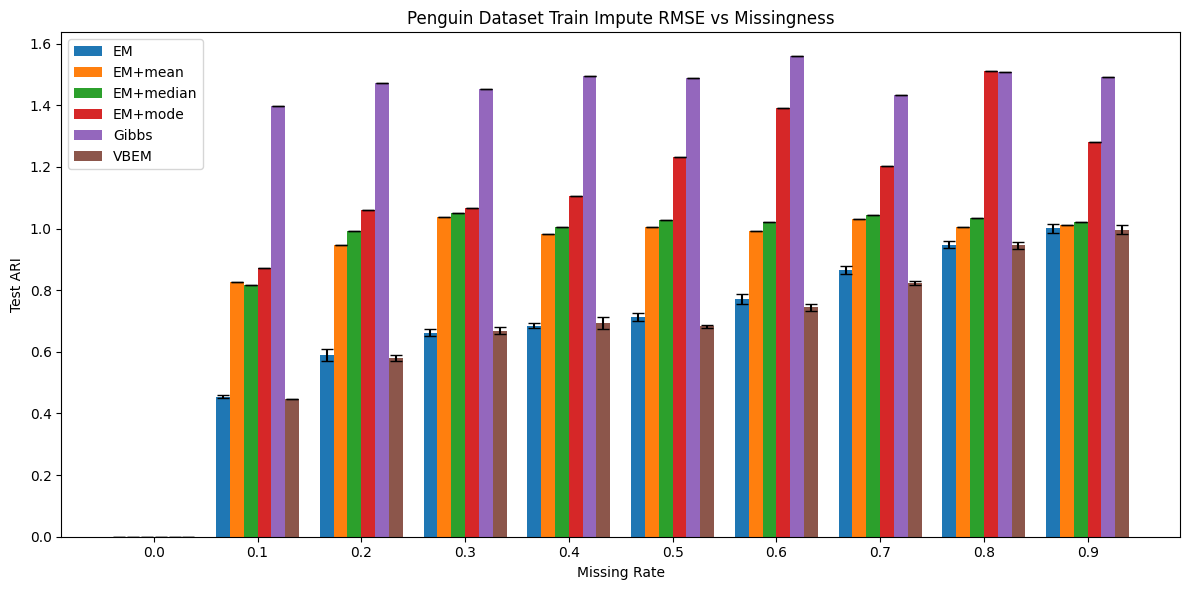

In [754]:
plot_grouped_bar_metric(penguin_df, metric='RMSE_train', title="Penguin Dataset Train Impute RMSE vs Missingness", ylabel="Test ARI")

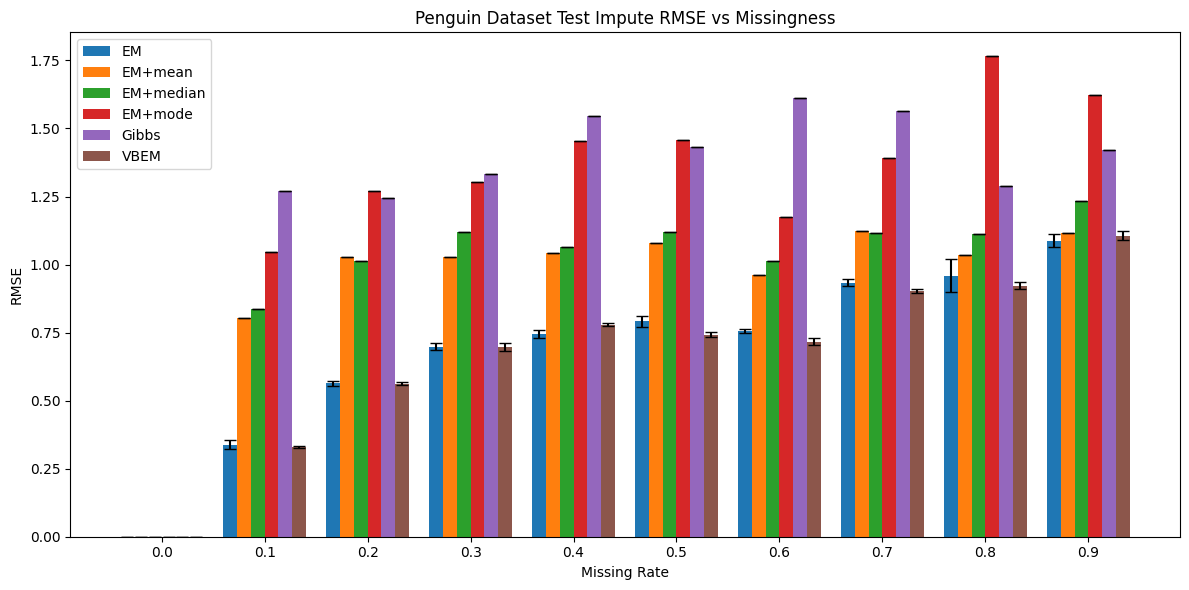

In [766]:
plot_grouped_bar_metric(penguin_df, metric='RMSE_test', title="Penguin Dataset Test Impute RMSE vs Missingness", ylabel="RMSE")

## 2.2 IRIS

In [1239]:
iris_df = pd.read_csv('./Results/gmm_iris.csv')

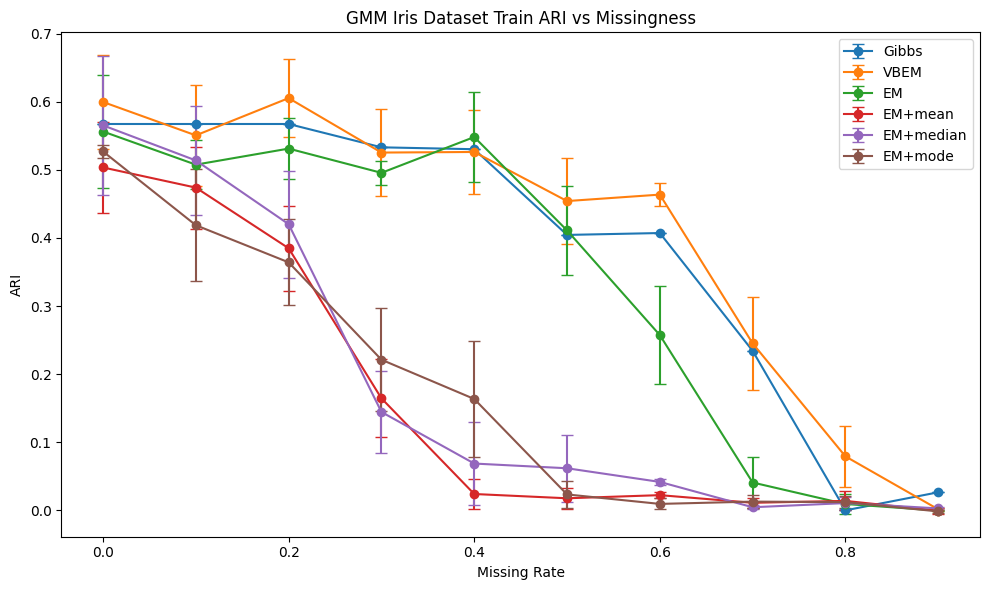

In [1299]:
plot_ari_by_missingness_line(iris_df, metric='train_ARI', title="GMM Iris Dataset Train ARI vs Missingness", ylabel="ARI")

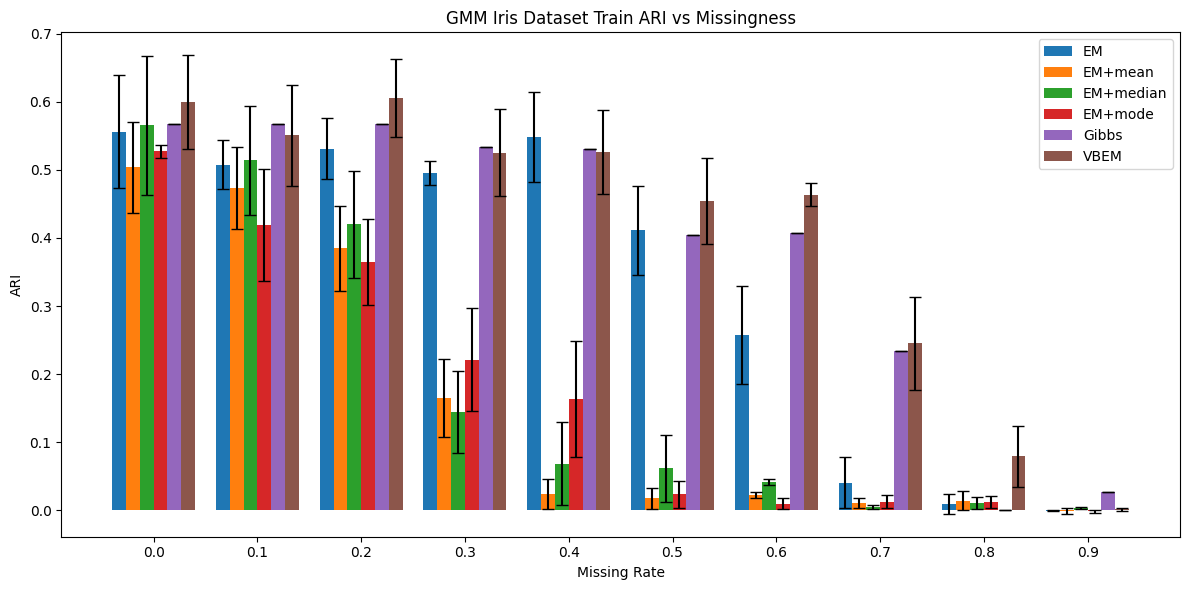

In [1300]:
plot_grouped_bar_metric(iris_df, metric='train_ARI', title="GMM Iris Dataset Train ARI vs Missingness", ylabel="ARI")

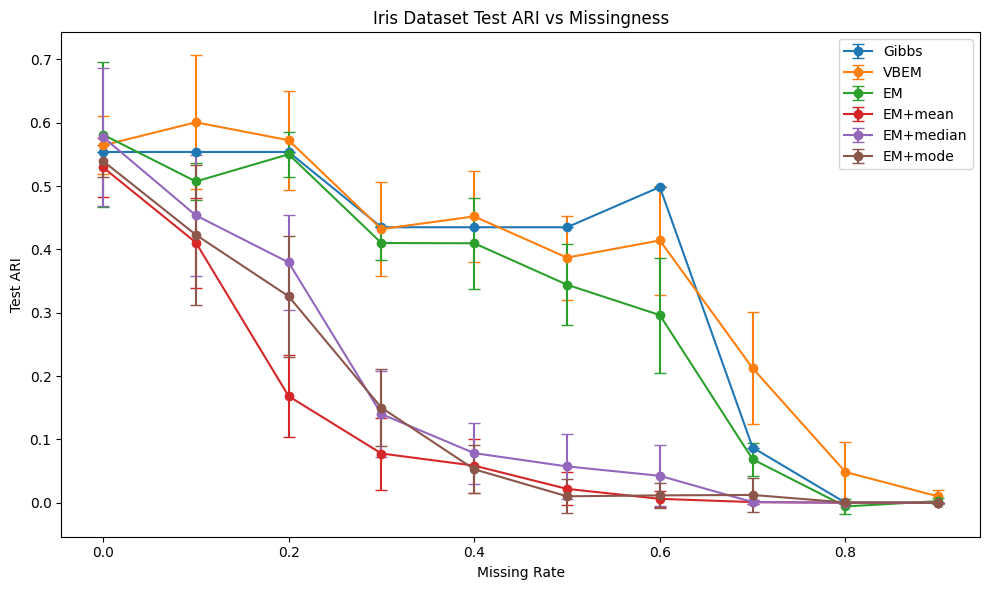

In [1314]:
plot_ari_by_missingness_line(iris_df, metric='test_ARI', title="Iris Dataset Test ARI vs Missingness", ylabel="Test ARI")

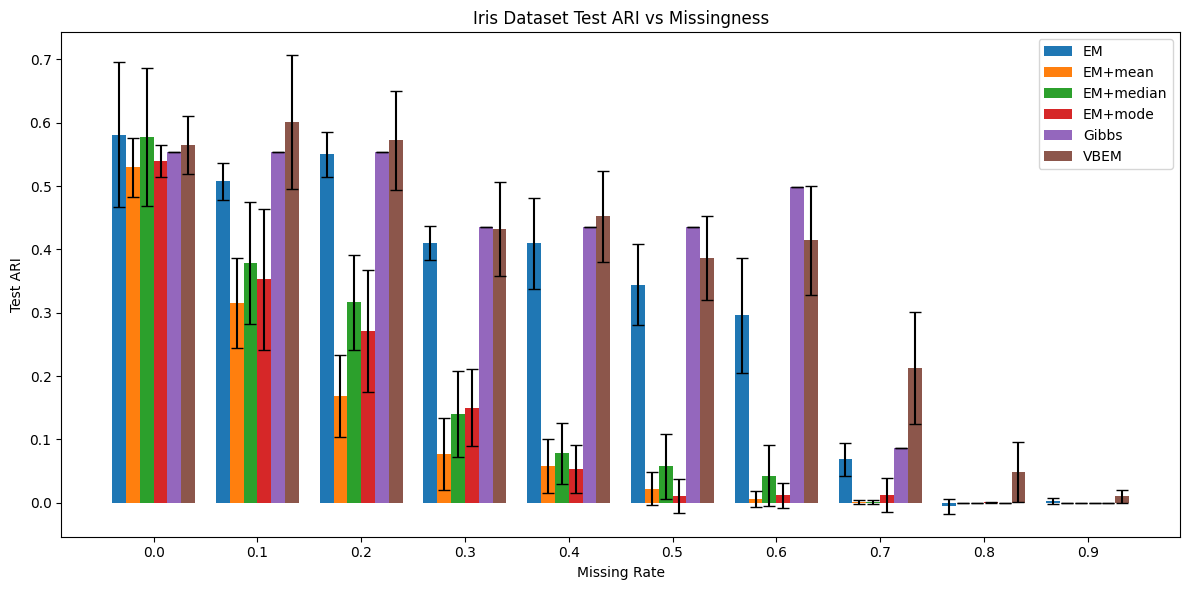

In [634]:
plot_grouped_bar_metric(iris_df, metric='test_ARI', title="Iris Dataset Test ARI vs Missingness", ylabel="Test ARI")

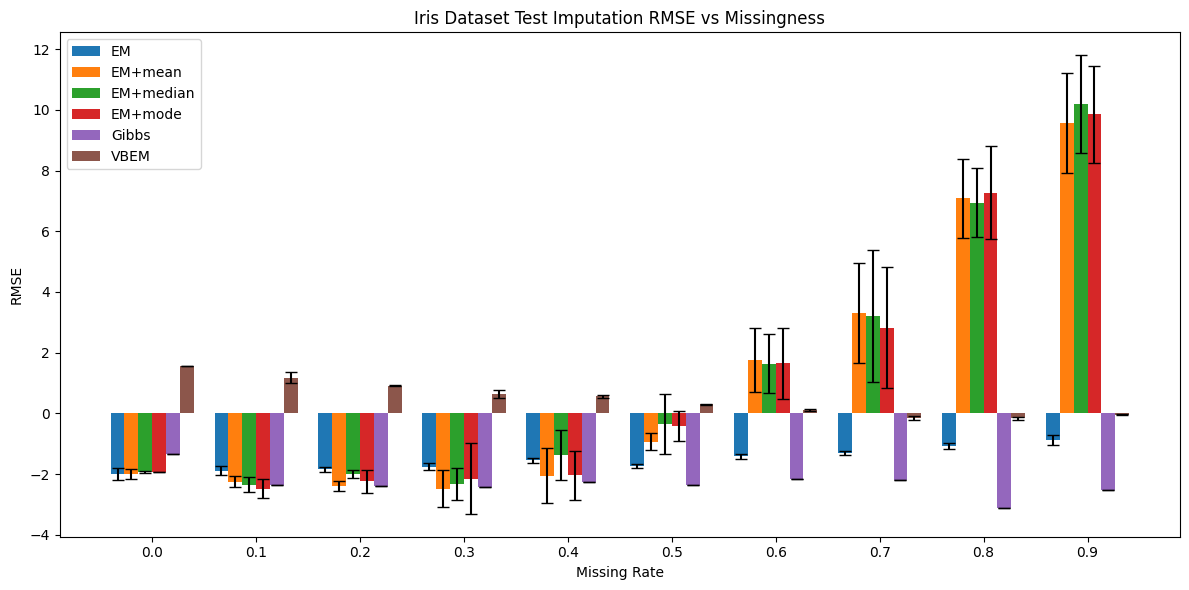

In [710]:
plot_grouped_bar_metric(iris_df, metric='loglike', title="Iris Dataset Test Imputation RMSE vs Missingness", ylabel="RMSE")

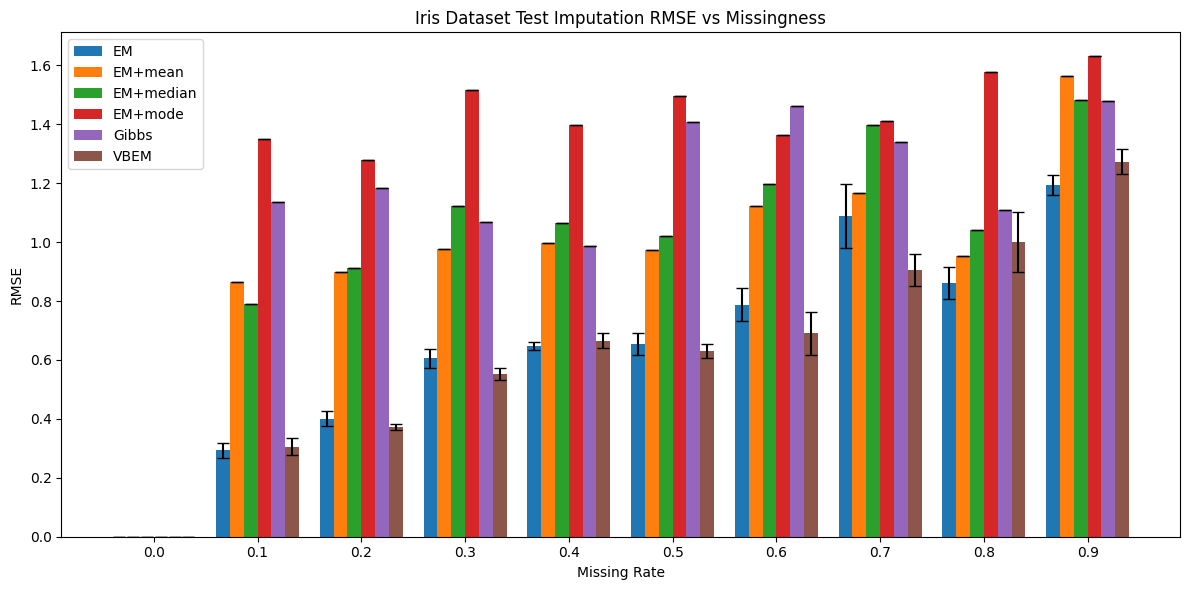

In [684]:
plot_grouped_bar_metric(iris_df, metric='RMSE_test', title="Iris Dataset Test Imputation RMSE vs Missingness", ylabel="RMSE")

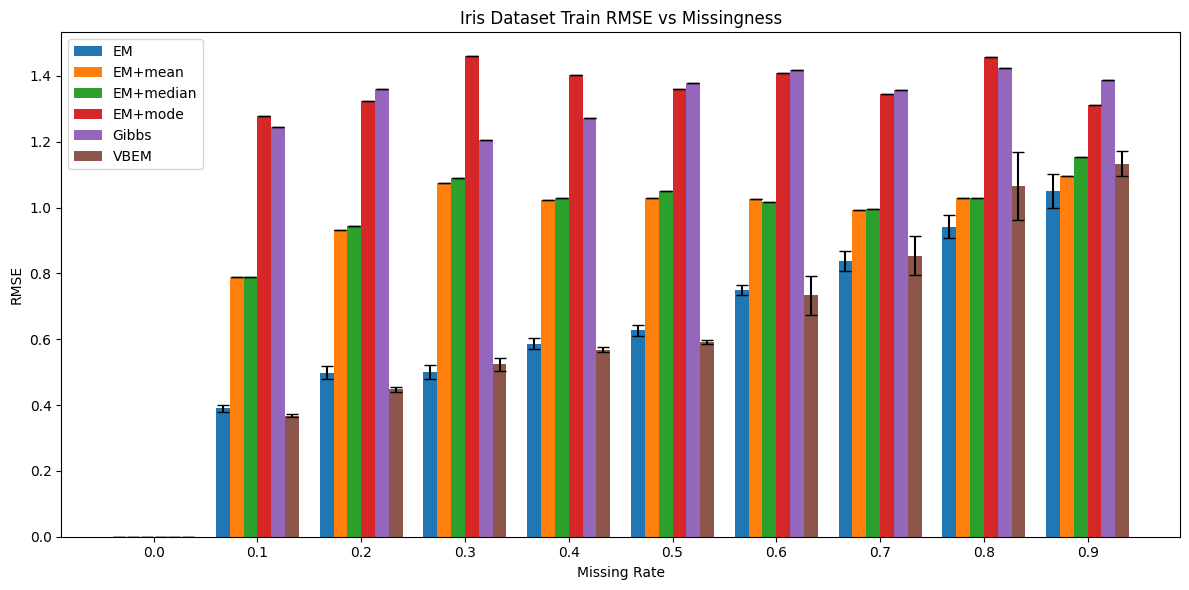

In [ ]:
plot_grouped_bar_metric(iris_df, metric='RMSE_train', title="Iris Dataset Train Imputation RMSE vs Missingness", ylabel="RMSE")

## 2.3 Synthetic GOOD

In [1317]:
synthetic_df = pd.read_csv("./Results/gmm_synthetic.csv")

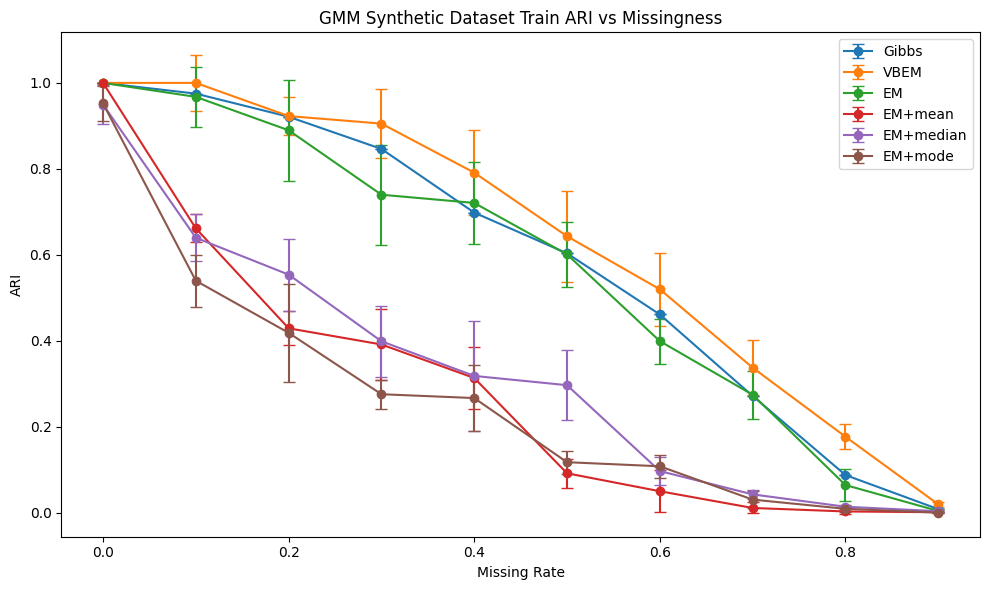

In [1382]:
plot_ari_by_missingness_line(synthetic_df, metric='train_ARI', title="GMM Synthetic Dataset Train ARI vs Missingness", ylabel="ARI")

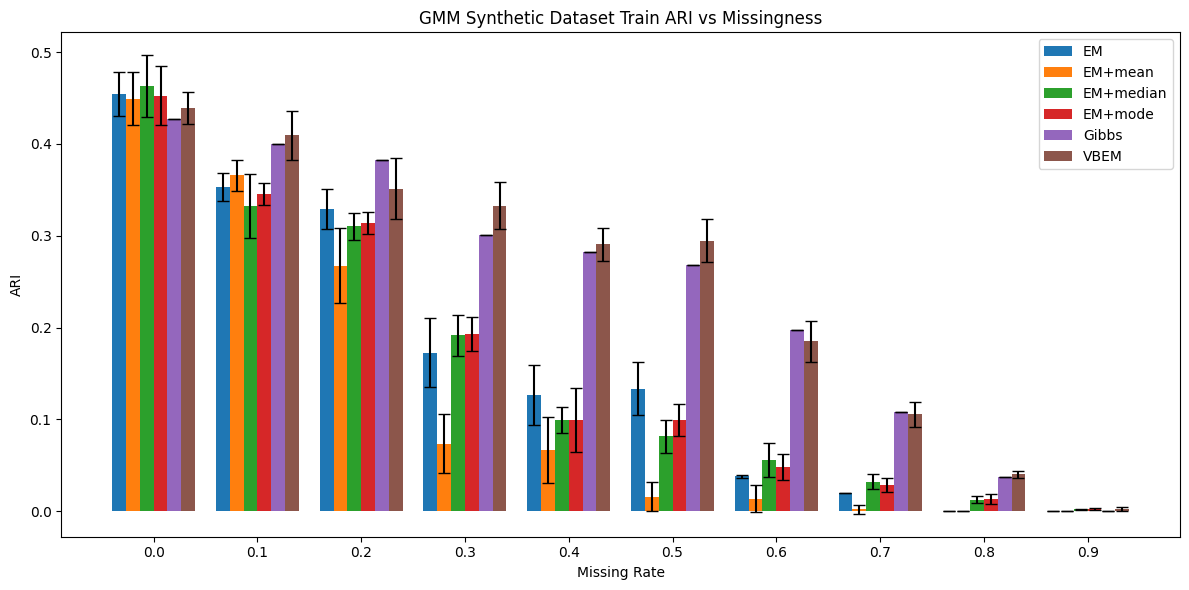

In [1243]:
plot_grouped_bar_metric(synthetic_df, metric='train_ARI', title="GMM Synthetic Dataset Train ARI vs Missingness", ylabel="ARI")

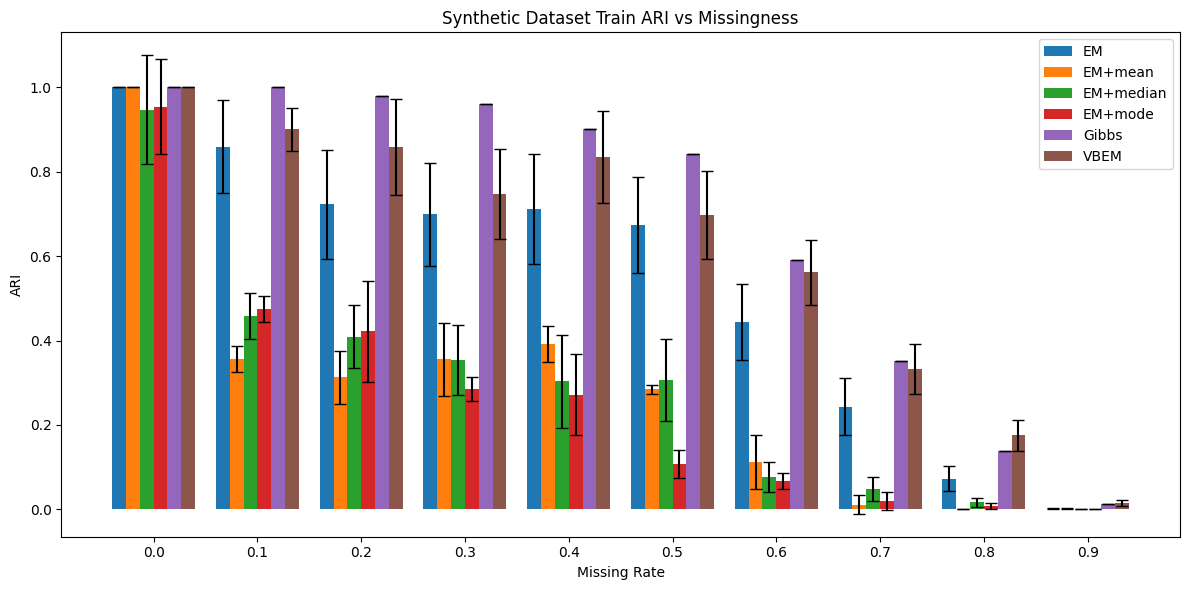

In [ ]:
plot_grouped_bar_metric(synthetic_df, metric='test_ARI', title="Synthetic Dataset Test ARI vs Missingness", ylabel="ARI")

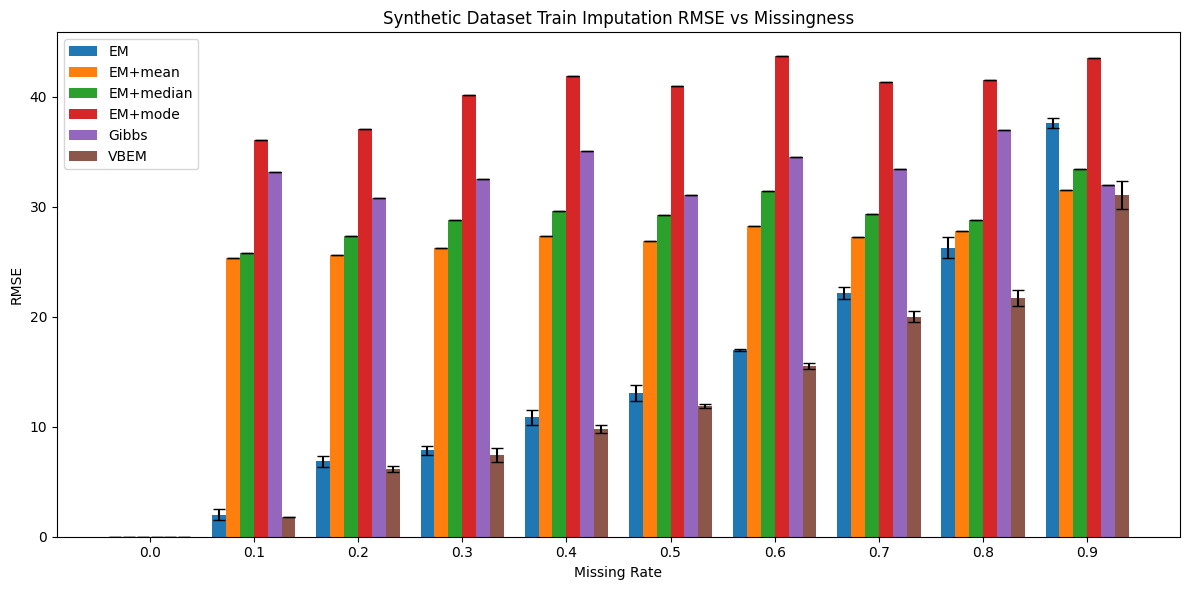

In [331]:
plot_grouped_bar_metric(synthetic_df, metric='RMSE_test', title="Synthetic Dataset Train Imputation RMSE vs Missingness", ylabel="RMSE")

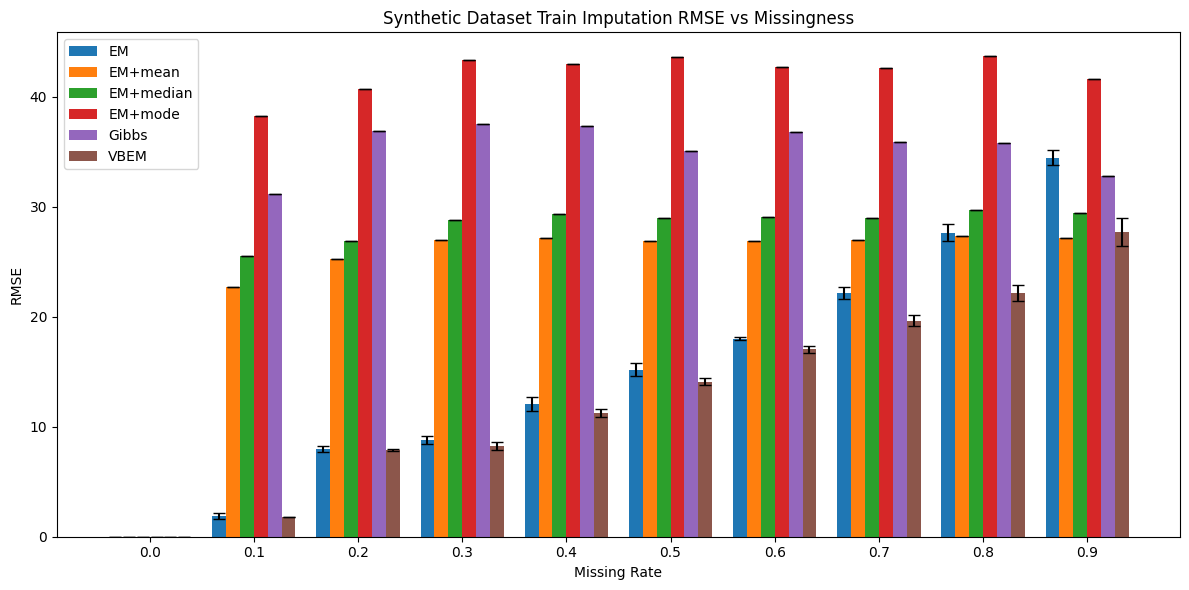

In [344]:
plot_grouped_bar_metric(synthetic_df, metric='RMSE_train', title="Synthetic Dataset Train Imputation RMSE vs Missingness", ylabel="RMSE")

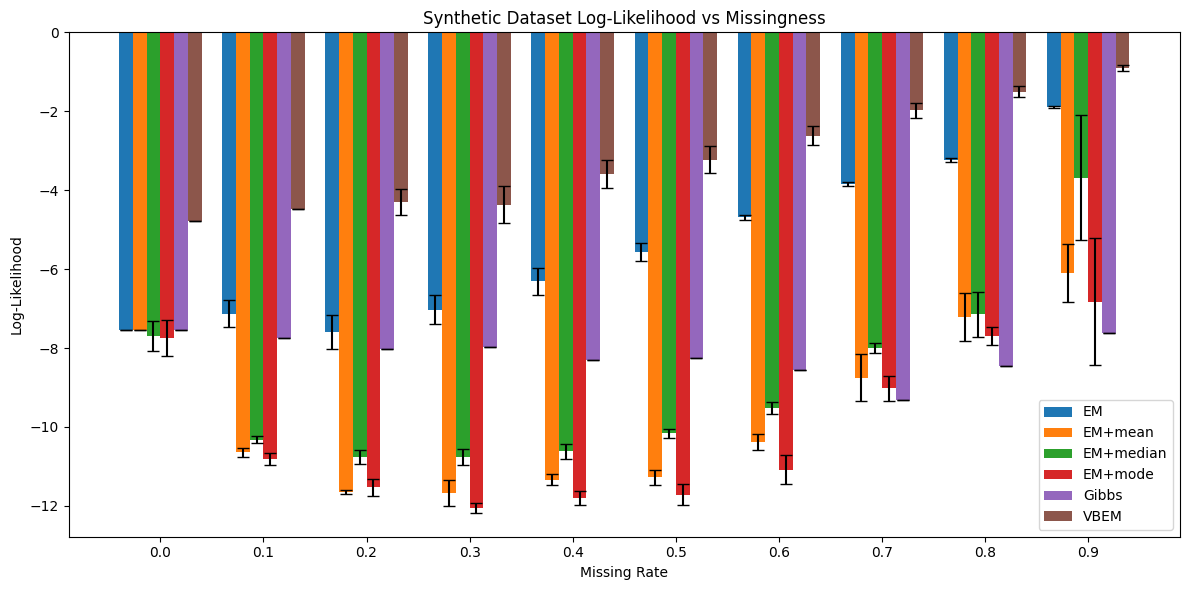

In [345]:
plot_grouped_bar_metric(synthetic_df, metric='loglike', title="Synthetic Dataset Log-Likelihood vs Missingness", ylabel="Log-Likelihood")

## 2.4 Synthetic Digits

In [20]:
digits_df = pd.read_csv("./Results/gmm_digits5x5.csv")

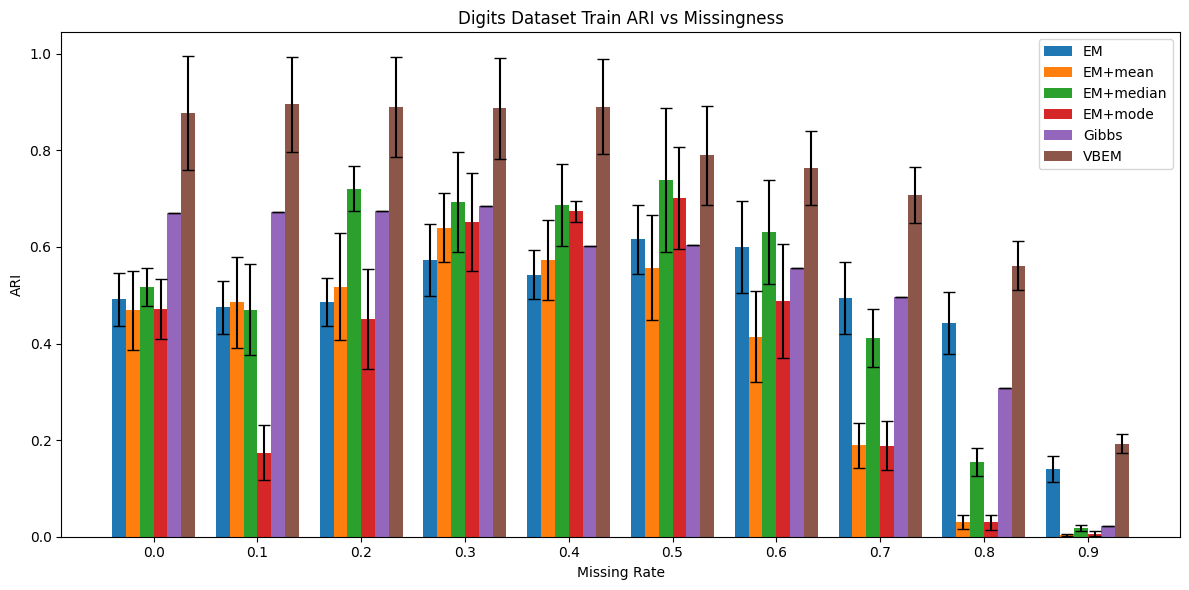

In [238]:
plot_grouped_bar_metric(digits_df, metric='train_ARI', title="Digits Dataset Train ARI vs Missingness", ylabel="ARI")

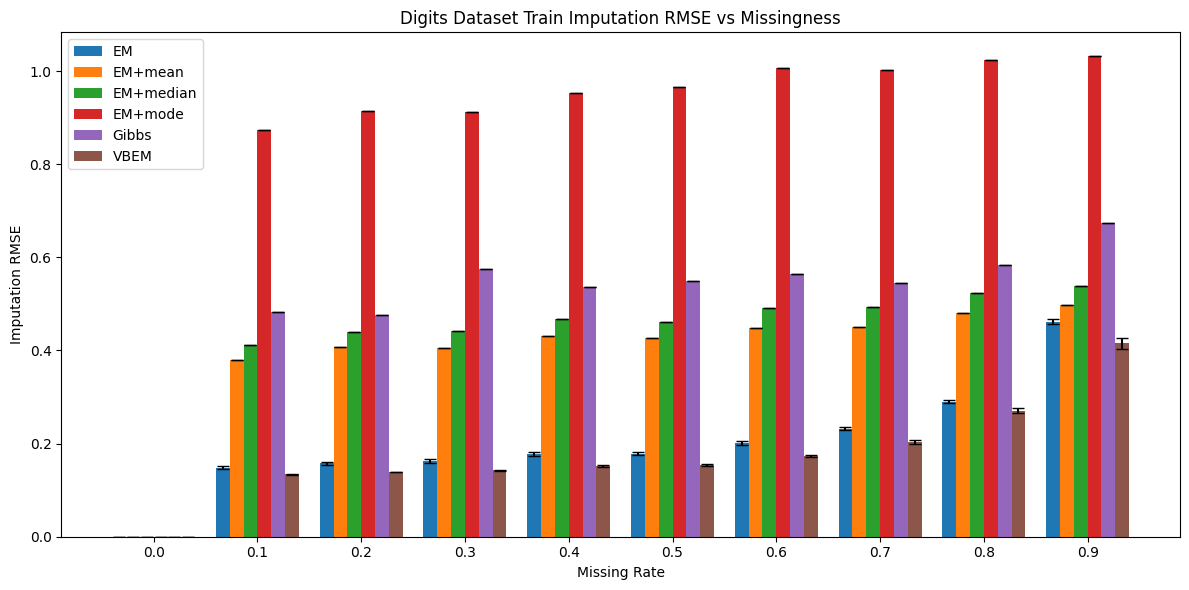

In [237]:
plot_grouped_bar_metric(digits_df, metric='RMSE_train', title="Digits Dataset Train Imputation RMSE vs Missingness", ylabel="Imputation RMSE")

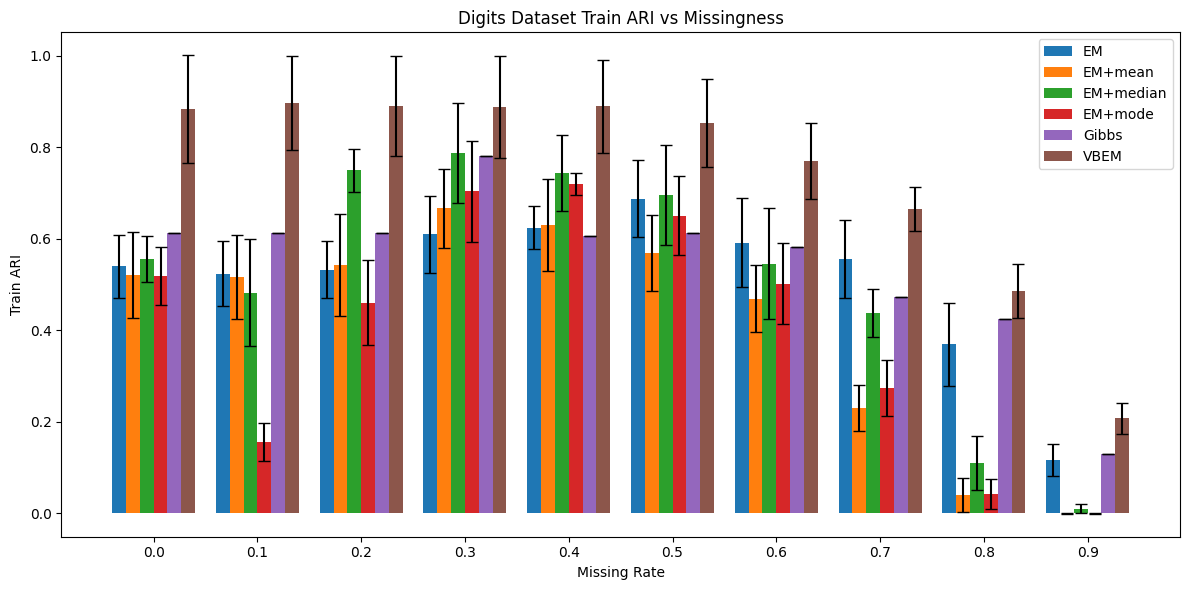

In [214]:
plot_grouped_bar_metric(digits_df, metric='test_ARI', title="Digits Dataset Train ARI vs Missingness", ylabel="Train ARI")

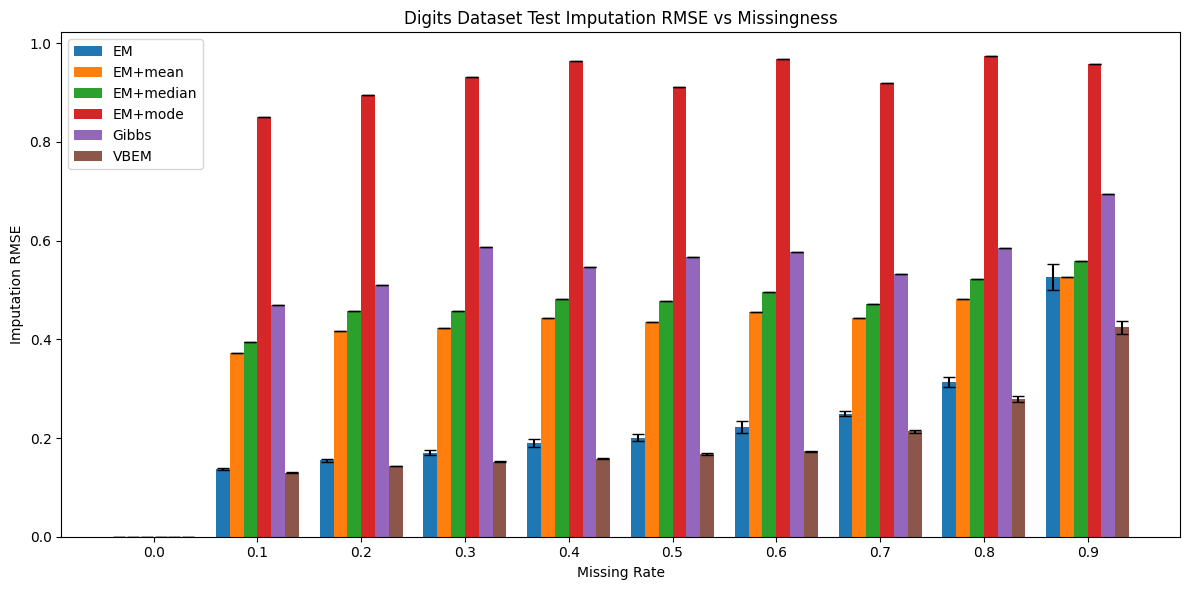

In [270]:
plot_grouped_bar_metric(digits_df, metric='RMSE_test', title="Digits Dataset Test Imputation RMSE vs Missingness", ylabel="Imputation RMSE")

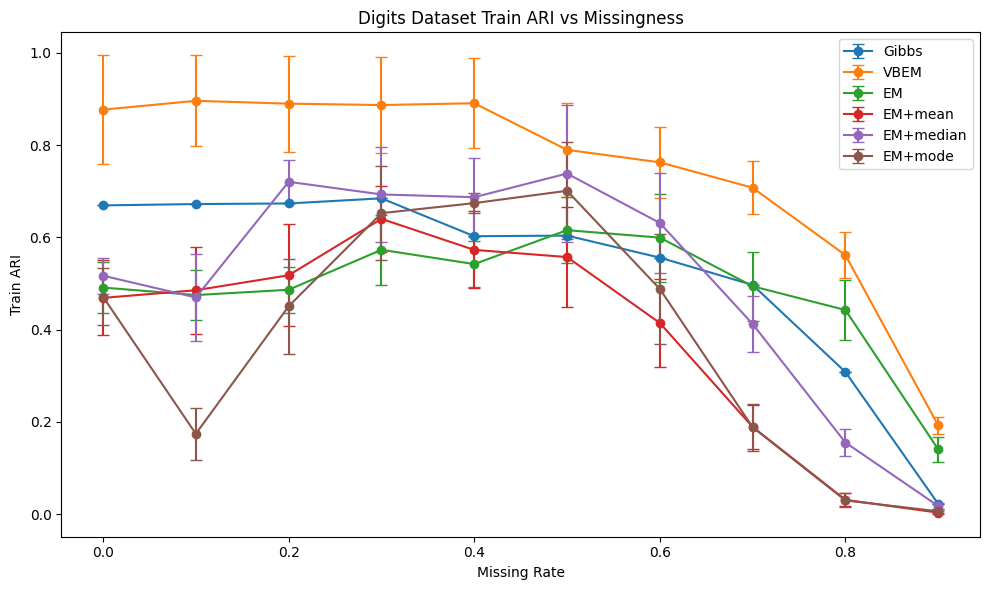

In [215]:
plot_ari_by_missingness_line(digits_df, metric='train_ARI', title="Digits Dataset Train ARI vs Missingness", ylabel="Train ARI")

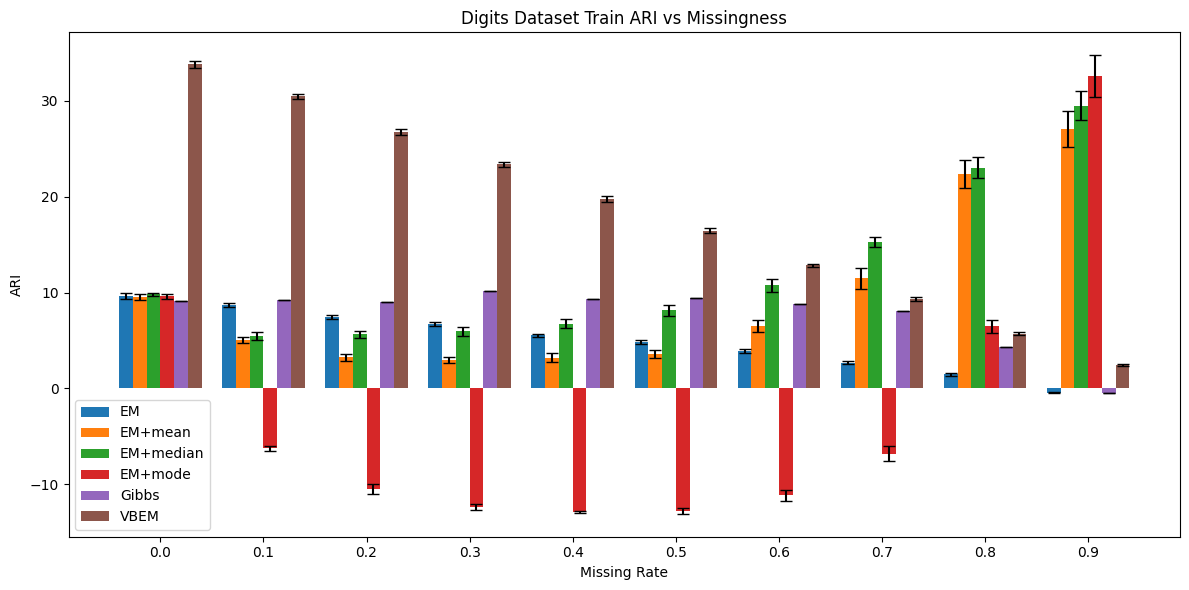

In [281]:
plot_grouped_bar_metric(digits_df, metric='loglike', title="Digits Dataset Train ARI vs Missingness", ylabel="ARI")

# MNAR Evaluation

## BMM

### Synthetic MNAR Dataset 
Different uniform missingness for each component

In [4]:
def generate_mnar_mixture_data(X, y, K, max_missingness=0.8):
    N,D = X.shape

    rng = np.random.default_rng(5099)
    
    N, D = X.shape

    γ_levels = np.linspace(0.0, max_missingness, K)
    γ = np.tile(γ_levels[:, None], (1, D)) 

    R = np.ones((N, D), dtype=bool)

    for n in range(N):
        k = y[n]
        R[n] = rng.binomial(1, 1 - γ[k])

    X_missing = X.copy().astype(np.float64)
    X_missing[~R] = np.nan

    return X_missing, R


In [7]:
dirpath_synthetic = "./../Datasets/Bernoulli/Processed/synthetic/"

X_train_synthetic = np.load(dirpath_synthetic + "X_train_synthetic.npy")
y_train_synthetic = np.load(dirpath_synthetic + "y_train_synthetic.npy")
X_test_synthetic = np.load(dirpath_synthetic + "X_test_synthetic.npy")
y_test_synthetic = np.load(dirpath_synthetic + "y_test_synthetic.npy")
means = np.load(dirpath_synthetic + "means_synthetic.npy")

X_train_mnar = generate_mnar_mixture_data(X_train_synthetic, y_train_synthetic, 5)[0]
X_test_mnar = generate_mnar_mixture_data(X_test_synthetic, y_test_synthetic, 5)[0]

mnar_dataset_train = Dataset(X_train_mnar, y_train_synthetic)
mnar_dataset_test = Dataset(X_test_mnar, y_test_synthetic)

Instantiate Models

In [10]:
bmm_mnar_params = BMMPriorParameters(X_train_mnar, 5)
bmm_gibbs_mnar = BMMGibbs(bmm_mnar_params)
bmm_gibbs_mcar = BMMGibbs(bmm_mnar_params)

Fit Models

In [11]:
bmm_result_mnar = bmm_gibbs_mnar.fit(X_train_mnar, mnar=True)
bmm_result_mcar = bmm_gibbs_mcar.fit(X_train_mnar, mnar=False)

In [12]:
bmm_mnar_ari = adjusted_rand_score(bmm_result_mnar['z'], y_train_synthetic)
bmm_mcar_ari = adjusted_rand_score(bmm_result_mcar['z'], y_train_synthetic)

In [18]:
bmm_gibbs_mnar.get_summarizing_results(y_train_synthetic)

{'avg_ari': 0.1994326286229078,
 'avg_ll': np.float64(-2.9496806324384086),
 'avg_pl': np.float64(-6546.170198737594)}

In [19]:
bmm_gibbs_mcar.get_summarizing_results(y_train_synthetic)

{'avg_ari': 0.1978767950202625,
 'avg_ll': np.float64(-2.9500744892277093),
 'avg_pl': np.float64(-6539.400170520702)}

In [13]:
print(bmm_mnar_ari, bmm_mcar_ari)

0.26693196227310095 0.26150358817809527


In [14]:
bmm_result_mnar_test_predict = bmm_gibbs_mnar.predict(X_test_mnar, mnar=True)
bmm_result_mcar_test_predict = bmm_gibbs_mcar.predict(X_test_mnar, mnar=False)

In [16]:
print(adjusted_rand_score(bmm_result_mnar_test_predict, y_test_synthetic), adjusted_rand_score(bmm_result_mcar_test_predict, y_test_synthetic))

0.2508158945394617 0.20796086477306053


### Synthetic MCAR Dataset

## GMM